<a href="https://colab.research.google.com/github/Vladgula/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [3]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### 1-2 Задания

Целевая переменная: Parental_Involvement (Low/Medium/High)

Parental_Involvement и School_Type

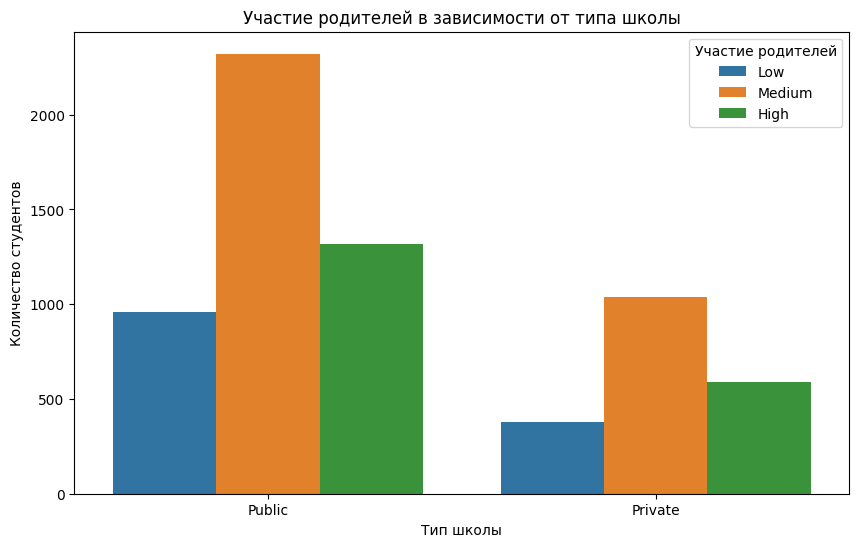

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='School_Type', hue='Parental_Involvement')
plt.title('Участие родителей в зависимости от типа школы')
plt.xlabel('Тип школы')
plt.ylabel('Количество студентов')
plt.legend(title='Участие родителей')
plt.show()

In [5]:
# Создаем таблицу сопряженности
table_school_parents = pd.crosstab(df['School_Type'], df['Parental_Involvement'])
print("Таблица сопряженности: School_Type vs Parental_Involvement")
table_school_parents

Таблица сопряженности: School_Type vs Parental_Involvement


Parental_Involvement,High,Low,Medium
School_Type,,,
Private,589,380,1040
Public,1319,957,2322


In [6]:
from scipy.stats import chi2_contingency

chi2_school_parents, p_school_parents, dof_school_parents, expected_school_parents = chi2_contingency(table_school_parents)
print(f"χ² = {chi2_school_parents:.2f}")
print(f"p-value = {p_school_parents}")
print(f"Степени свободы = {dof_school_parents}")

χ² = 3.12
p-value = 0.20967481685392614
Степени свободы = 2


p ≥ 0.05 → зависимость не доказана

Parental_Involvement и Hours_Studied

In [7]:
# Бинаризация Exam_Score
df['Study_Hours_Level'] = df['Hours_Studied'].apply(
    lambda x: 'high' if x > 20 else 'low'  # Медиана = 20 часов
)

print("Распределение по уровням часов обучения:")
print(df['Study_Hours_Level'].value_counts())

Распределение по уровням часов обучения:
Study_Hours_Level
low     3544
high    3063
Name: count, dtype: int64


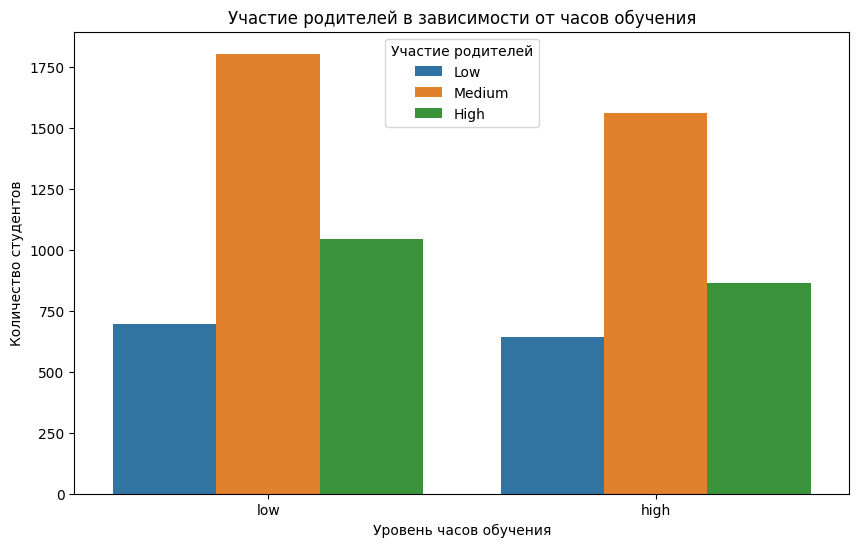

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Study_Hours_Level', hue='Parental_Involvement', order=['low', 'high'])
plt.title('Участие родителей в зависимости от часов обучения')
plt.xlabel('Уровень часов обучения')
plt.ylabel('Количество студентов')
plt.legend(title='Участие родителей')
plt.show()

In [9]:
table_study_parents = pd.crosstab(df['Study_Hours_Level'], df['Parental_Involvement'])
print("Таблица сопряженности: Study_Hours_Level vs Parental_Involvement")
table_study_parents

Таблица сопряженности: Study_Hours_Level vs Parental_Involvement


Parental_Involvement,High,Low,Medium
Study_Hours_Level,,,
high,864,640,1559
low,1044,697,1803


In [10]:
chi2_study_parents, p_study_parents, dof_study_parents, expected_study_parents = chi2_contingency(table_study_parents)
print(f"χ² = {chi2_study_parents:.2f}")
print(f"p-value = {p_study_parents}")
print(f"Степени свободы = {dof_study_parents}")

χ² = 2.11
p-value = 0.34760969380024587
Степени свободы = 2


p ≥ 0.05 → зависимость не доказана

Parental_Involvement и Exam_Score


In [11]:
# Бинаризируем экзаменационные баллы по медиане
df['Exam_Score_Level'] = df['Exam_Score'].apply(
    lambda x: 'high' if x > df['Exam_Score'].median() else 'low'
)

print("Описательная статистика Exam_Score:")
print(f"Медиана экзаменационных баллов: {df['Exam_Score'].median():.1f}")
print(f"Минимум: {df['Exam_Score'].min()}")
print(f"Максимум: {df['Exam_Score'].max()}")
print(f"Среднее: {df['Exam_Score'].mean():.1f}")
print(f"Стандартное отклонение: {df['Exam_Score'].std():.1f}")

Описательная статистика Exam_Score:
Медиана экзаменационных баллов: 67.0
Минимум: 55
Максимум: 101
Среднее: 67.2
Стандартное отклонение: 3.9


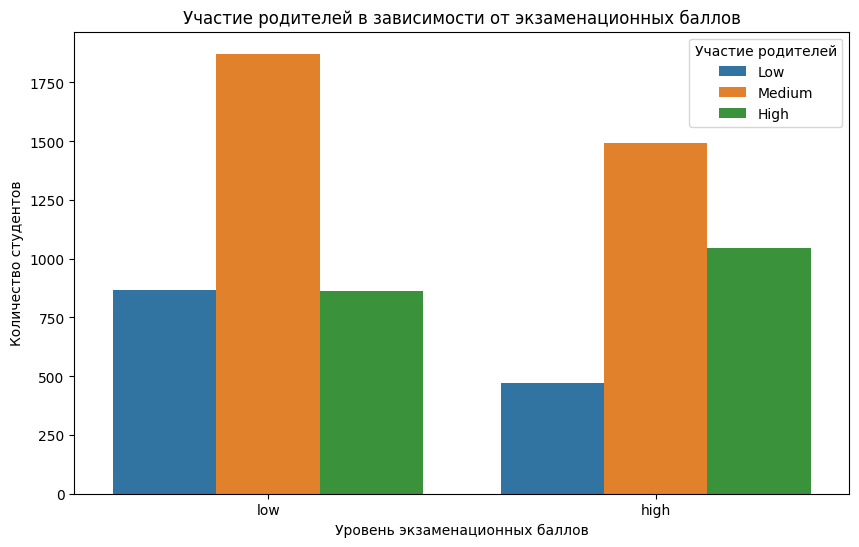

In [12]:
# Визуализируем распределение Parental_Involvement по уровню экзаменационных баллов
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exam_Score_Level', hue='Parental_Involvement', order=['low', 'high'])
plt.title('Участие родителей в зависимости от экзаменационных баллов')
plt.xlabel('Уровень экзаменационных баллов')
plt.ylabel('Количество студентов')
plt.legend(title='Участие родителей')
plt.show()

In [13]:
# Создаем таблицу сопряженности
table_exam_parents = pd.crosstab(df['Exam_Score_Level'], df['Parental_Involvement'])
print("Таблица сопряженности: Exam_Score_Level vs Parental_Involvement")
table_exam_parents

Таблица сопряженности: Exam_Score_Level vs Parental_Involvement


Parental_Involvement,High,Low,Medium
Exam_Score_Level,,,
high,1046,472,1490
low,862,865,1872


In [14]:
chi2_exam_parents, p_exam_parents, dof_exam_parents, expected_exam_parents = chi2_contingency(table_exam_parents)
print(f"χ² = {chi2_exam_parents:.2f}")
print(f"p-value = {p_exam_parents}")
print(f"Степени свободы = {dof_exam_parents}")

χ² = 124.80
p-value = 7.941666550485949e-28
Степени свободы = 2


p < 0.05 → зависимость есть (значимая)

### 3 Задание

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Создаем копию датафрейма
df_analysis = df.copy()

# Кодируем целевую переменную
le_target = LabelEncoder()
df_analysis['Parental_Involvement_encoded'] = le_target.fit_transform(df_analysis['Parental_Involvement'])

# Список всех потенциальных признаков
all_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

# Категориальные признаки для кодирования
categorical_features = ['Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
                       'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                       'Distance_from_Home', 'Gender']

# Кодируем категориальные признаки
for feature in categorical_features:
    le = LabelEncoder()
    df_analysis[feature + '_encoded'] = le.fit_transform(df_analysis[feature].astype(str))
    all_features.append(feature + '_encoded')

# подготовка X и y
X = df_analysis[all_features]
y = df_analysis['Parental_Involvement_encoded']

In [23]:
# Финальный вывод best_features
print("Best_features для модели (топ-8 по ANOVA F-test):")
best_features = ['Exam_Score', 'Extracurricular_Activities_encoded', 'Gender_encoded',
                 'Previous_Scores', 'School_Type_encoded', 'Peer_Influence_encoded',
                 'Parental_Education_level_encoded', 'Hours_Studied']

for i, feature in enumerate(best_features, 1):
    print(f"{i}. {feature}")

Best_features для модели (топ-8 по ANOVA F-test):
1. Exam_Score
2. Extracurricular_Activities_encoded
3. Gender_encoded
4. Previous_Scores
5. School_Type_encoded
6. Peer_Influence_encoded
7. Parental_Education_level_encoded
8. Hours_Studied


### 4 Задание

In [58]:

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Берём исходные ненормализованные данные
X_raw = df[['Exam_Score', 'Previous_Scores', 'Hours_Studied',
           'Extracurricular_Activities', 'Gender',
           'School_Type', 'Peer_Influence', 'Parental_Education_Level']]

# Только OneHotEncoding без нормализации
categorical_features = ['Extracurricular_Activities', 'Gender', 'School_Type',
                       'Peer_Influence', 'Parental_Education_Level']

ohe = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = ohe.fit_transform(X_raw[categorical_features])
onehot_columns = ohe.get_feature_names_out(categorical_features)
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_columns, index=X_raw.index)

X_unnormalized = pd.concat([X_raw[['Exam_Score', 'Previous_Scores', 'Hours_Studied']], onehot_df], axis=1)

# Теперь сравнение будет показательным
X_train, X_test, y_train, y_test = train_test_split(
    X_unnormalized, y, test_size=0.3, random_state=42, stratify=y
)

# --- БЕЗ нормализации ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# --- ПОСЛЕ нормализации ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("🎯 СРАВНЕНИЕ ДО/ПОСЛЕ НОРМАЛИЗАЦИИ:")
print(f"Точность БЕЗ нормализации: {acc_raw:.10f}")
print(f"Точность ПОСЛЕ нормализации: {acc_scaled:.10f}")

🎯 СРАВНЕНИЕ ДО/ПОСЛЕ НОРМАЛИЗАЦИИ:
Точность БЕЗ нормализации: 0.4084720121
Точность ПОСЛЕ нормализации: 0.3857791225


### 5 задание

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Проверяем распределение целевой переменной
print("Распределение Parental_Involvement:")
print(y.value_counts())

# Разделение данных с stratify (как у педагога)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nРазделение данных:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Создаем и обучаем модель (как у педагога)
model = LogisticRegression(
    penalty=None,           # без регуляризации
    random_state=42,
    max_iter=1000
)

model.fit(X_train, y_train)
print("Модель логистической регрессии обучена")

Распределение Parental_Involvement:
Parental_Involvement_encoded
2    3362
0    1908
1    1337
Name: count, dtype: int64

Разделение данных:
X_train: (4624, 11), y_train: (4624,)
X_test: (1983, 11), y_test: (1983,)
Модель логистической регрессии обучена


### 6 Задание

In [67]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

# Функция evaluate_classification
def evaluate_classification(y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC
    roc_auc = None
    if y_proba is not None:
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc, "precision": prec, "recall": rec,
        "f1": f1, "roc_auc": roc_auc, "confusion_matrix": cm
    }

# Оценка модели
print("МЕТРИКИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ:")
metrics_train = evaluate_classification(y_train, y_train_pred, y_train_proba)

print("\nМЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ:")
metrics_test = evaluate_classification(y_test, y_pred, y_proba)

МЕТРИКИ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ:
=== Метрики классификации ===
Accuracy:  0.5097
Precision: 0.3959
Recall:    0.5097
F1-score:  0.3588
ROC-AUC:   0.5929

Confusion Matrix:
[[  41    0 1294]
 [  10    0  926]
 [  36    1 2316]]

МЕТРИКИ НА ТЕСТОВОЙ ВЫБОРКЕ:
=== Метрики классификации ===
Accuracy:  0.5129
Precision: 0.4095
Recall:    0.5129
F1-score:  0.3618
ROC-AUC:   0.5854

Confusion Matrix:
[[ 19   0 554]
 [  8   0 393]
 [ 10   1 998]]


In [65]:
# Показываем вероятности для первых 10 примеров
print("\n🎯 ВЕРОЯТНОСТИ ПРЕДСКАЗАНИЙ (первые 10 примеров):")
for i in range(10):
    print([round(float(item), 2) for item in list(y_proba[i] * 100)])


🎯 ВЕРОЯТНОСТИ ПРЕДСКАЗАНИЙ (первые 10 примеров):
[17.64, 35.09, 47.28]
[24.19, 21.41, 54.4]
[24.12, 28.01, 47.87]
[37.04, 15.12, 47.83]
[24.95, 27.52, 47.53]
[24.44, 19.91, 55.65]
[37.51, 13.87, 48.62]
[29.33, 17.6, 53.08]
[18.59, 26.99, 54.42]
[23.7, 23.92, 52.38]


In [66]:
# Выводим коэффициенты модели
print("\n📈 КОЭФФИЦИЕНТЫ МОДЕЛИ:")
feature_names = X.columns.tolist()
coefficients = model.coef_

for i, class_name in enumerate(model.classes_):
    print(f"\nКласс {class_name} ({i}):")
    for j, feature in enumerate(feature_names):
        print(f"  {feature}: {coefficients[i][j]:.4f}")


📈 КОЭФФИЦИЕНТЫ МОДЕЛИ:

Класс 0 (0):
  Exam_Score: 4.0665
  Previous_Scores: -0.1897
  Hours_Studied: -1.1924
  Extracurricular_Activities_Yes: -0.1927
  Gender_Male: -0.0849
  School_Type_Public: -0.0582
  Peer_Influence_Neutral: -0.0204
  Peer_Influence_Positive: 0.0155
  Parental_Education_Level_High School: -0.0166
  Parental_Education_Level_Postgraduate: -0.1675
  Parental_Education_Level_nan: -0.0495

Класс 1 (1):
  Exam_Score: -4.5168
  Previous_Scores: 0.2880
  Hours_Studied: 1.3063
  Extracurricular_Activities_Yes: 0.1671
  Gender_Male: -0.0111
  School_Type_Public: 0.0784
  Peer_Influence_Neutral: -0.0321
  Peer_Influence_Positive: -0.0064
  Parental_Education_Level_High School: -0.0831
  Parental_Education_Level_Postgraduate: 0.1239
  Parental_Education_Level_nan: -0.1054

Класс 2 (2):
  Exam_Score: 0.4503
  Previous_Scores: -0.0983
  Hours_Studied: -0.1139
  Extracurricular_Activities_Yes: 0.0256
  Gender_Male: 0.0960
  School_Type_Public: -0.0202
  Peer_Influence_Neutral: